In [202]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
lse = pd.read_csv('LSE.csv')

In [94]:
lse

,Year,Beginning Price (in million GBP),Ending Price (in million GBP),Gain or Loss (in million GBP),Percent Gain or Loss
0,2002,5217.40,3940.40,-1277.00,-24.48%
1,2003,3940.40,4476.90,536.50,13.62%
2,2004,4476.90,4814.30,337.40,7.54%
3,2005,4814.30,5618.80,804.50,16.71%
4,2006,5618.80,6220.80,602.00,10.71%
5,2007,6220.80,6456.90,236.10,3.8%
6,2008,6456.90,4434.20,-2022.70,-31.33%
7,2009,4434.20,5412.90,978.70,22.07%
8,2010,5412.90,5899.90,487.00,9%
9,2011,5899.90,5572.30,-327.60,-5.55%


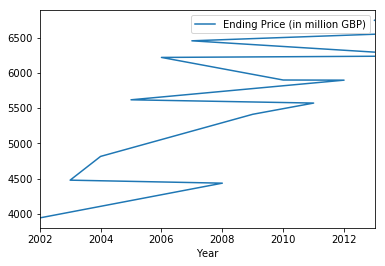

In [216]:
lse.plot(x='Year',y='Ending Price (in million GBP)')

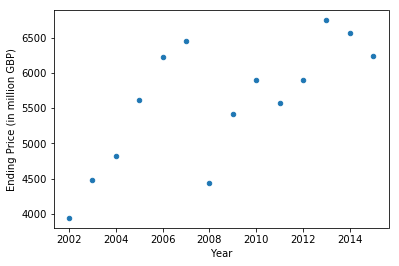

In [206]:
stamp.plot(kind='scatter',x='Year',y='Price (in million GBP)')

In [98]:
wine = pd.read_csv('Wine.csv')

In [99]:
wine = wine.fillna(wine['Price (in million GBP)'].mean())
wine

,Year,Price (in million GBP)
0,2002,98.910000
1,2003,100.000000
2,2004,97.870000
3,2005,115.090000
4,2006,172.270000
5,2007,232.680000
6,2008,202.936667
7,2009,202.936667
8,2010,329.160000
9,2011,297.960000


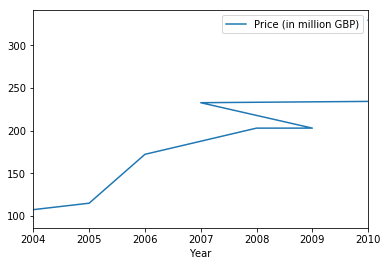

In [215]:
wine.plot(x='Year')

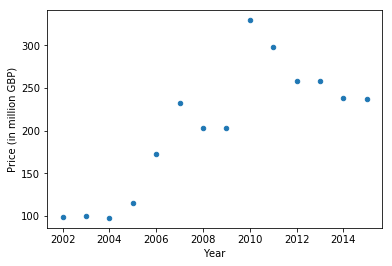

In [103]:
wine.plot(kind='scatter',x='Year',y='Price (in million GBP)')

In [106]:
stamp = pd.read_csv('Stamp.csv')
stamp

,Year,Price (in million GBP)
0,2002,8.7045
1,2003,9.8855
2,2004,11.7025
3,2005,12.8945
4,2006,14.5255
5,2007,16.5125
6,2008,22.6200
7,2009,24.1950
8,2010,25.6250
9,2011,26.9350


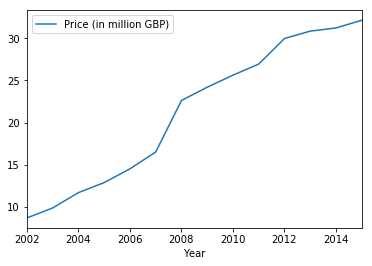

In [107]:
stamp.plot(x='Year')

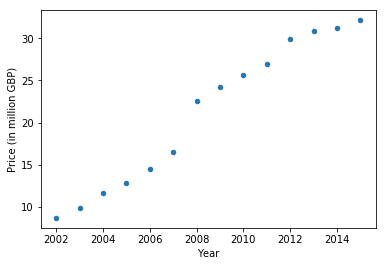

In [108]:
stamp.plot(kind='scatter',x='Year',y='Price (in million GBP)')

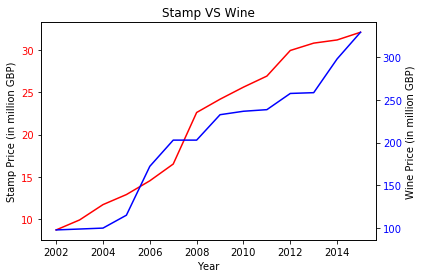

In [217]:
fig_size[0] = 15
fig_size[1] = 12
def two_scales(ax1, year, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(year, data1, color=c1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Stamp Price (in million GBP)')

    ax2.plot(year, data2, color=c2)
    ax2.set_ylabel('Wine Price (in million GBP)')
    return ax1, ax2

year = list(stamp['Year'])
s1 = stamp['Price (in million GBP)']
s2 = wine['Price (in million GBP)']


# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, y, s1, s2, 'r', 'b')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
fig_size[0] = 15
fig_size[1] = 12
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.title('Stamp VS Wine')
plt.show()

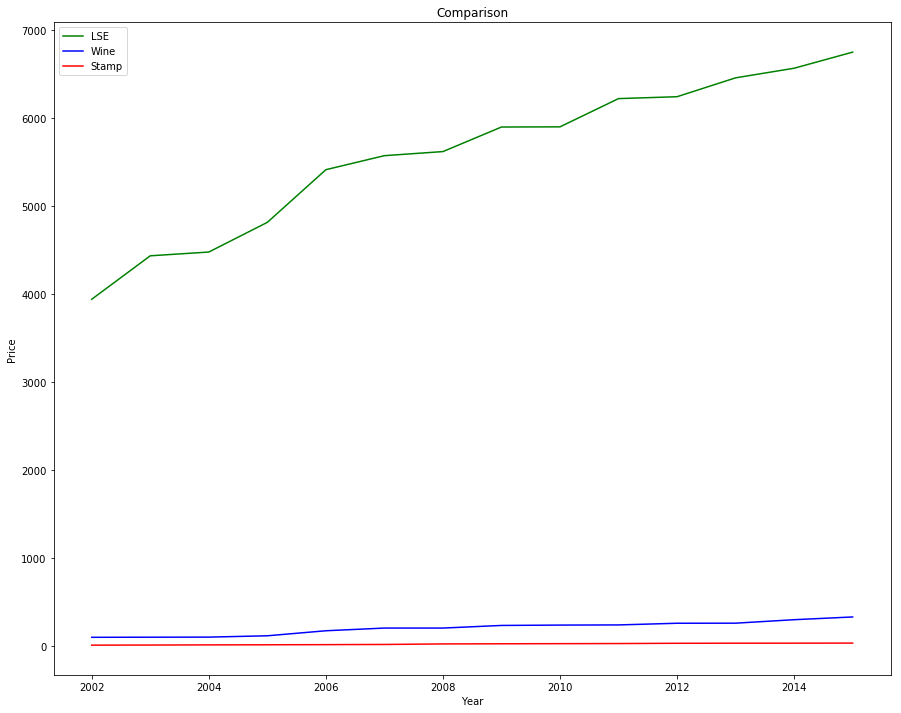

In [197]:
fig_size[0] = 15
fig_size[1] = 12
year = list(stamp['Year'])
plt.plot(year, lse['Ending Price (in million GBP)'], 'g-', label='LSE')
plt.plot(year, wine['Price (in million GBP)'], 'b-', label='Wine')
plt.plot(year, stamp['Price (in million GBP)'], 'r-', label='Stamp')
plt.title('Comparison')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.show()

# Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

In [113]:
from sklearn import linear_model as lm

## Stamp

In [125]:
X = list(stamp['Year'])
y = list(stamp['Price (in million GBP)'])
year = np.reshape(X,(len(X),1))
price = np.reshape(y,(len(y),1))

In [126]:
model = lm.LinearRegression()
results = model.fit(year, price)
print(model.intercept_, model.coef_)

[-4048.30354286] [[ 2.02617473]]


The relationship equation between year and price is : 
 price = 2.02617473 * year + (-4048.30354286)

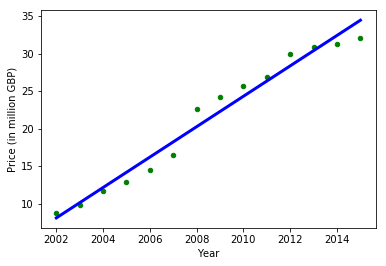

In [129]:
stamp.plot(kind='scatter',x='Year',y='Price (in million GBP)',color='green')
plt.plot(year,model.predict(year),color='blue',linewidth=3)

In [164]:
stamp_mean = stamp['Price (in million GBP)'].mean()
stamp = stamp.sort_values(['Price (in million GBP)'])
stamp_median = stamp['Price (in million GBP)'].median()
stamp_stdev = stamp['Price (in million GBP)'].std()
stamp_var = stamp['Price (in million GBP)'].var()
stamp_cov = stamp['Price (in million GBP)'].cov(stamp['Year'])
stamp_corr = stamp['Price (in million GBP)'].corr(stamp['Year'])

Mean = 21.268392857142857

Median = 23.4075

Variance = 74.07002835302198

Standard Deviation = 8.606394619875502

Covariance = 35.45805769230769

Correlation = 0.98486037085500699

## Wine 

In [145]:
X = list(wine['Year'])
y = list(wine['Price (in million GBP)'])
year = np.reshape(X,(len(X),1))
price = np.reshape(y,(len(y),1))

In [146]:
model = lm.LinearRegression()
results = model.fit(year, price)
print(model.intercept_, model.coef_)

[-29267.71761905] [[ 14.67296703]]


The relationship equation between year and price is :
 price = (14.67296703) * year + (-29267.71761905)

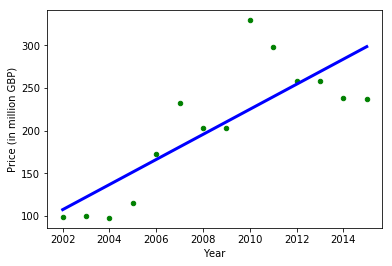

In [149]:
wine.plot(kind='scatter',x='Year',y='Price (in million GBP)',color='green')
plt.plot(year,model.predict(year),color='blue',linewidth=3)

In [167]:
wine_mean = wine['Price (in million GBP)'].mean()
wine = wine.sort_values(['Price (in million GBP)'])
wine_median = wine['Price (in million GBP)'].median()
wine_stdev = wine['Price (in million GBP)'].std()
wine_var = wine['Price (in million GBP)'].var()
wine_cov = wine['Price (in million GBP)'].cov(wine['Year'])
wine_corr = wine['Price (in million GBP)'].corr(wine['Year'])

Mean = 202.93666666666667

Median = 217.80833333333334

Variance = 5802.843235897437

Standard Deviation = 76.17639552970091

Covariance = 256.77692307692314

Correlation = 0.80578011743475941

# London Stock Exchange (LSE)

In [168]:
X = list(lse['Year'])
y = list(lse['Ending Price (in million GBP)'])
year = np.reshape(X,(len(X),1))
price = np.reshape(y,(len(y),1))

In [169]:
model = lm.LinearRegression()
results = model.fit(year, price)
print(model.intercept_, model.coef_)

[-296067.97857143] [[ 150.1921978]]


The relationship equation between year and price is :
    price = (150.1921978) * year + (-296067.97857143)

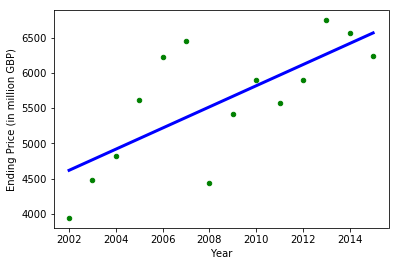

In [171]:
lse.plot(kind='scatter',x='Year',y='Ending Price (in million GBP)',color='green')
plt.plot(year,model.predict(year),color='blue',linewidth=3)

In [181]:
lse_mean = lse['Ending Price (in million GBP)'].mean()
lse = lse.sort_values(['Ending Price (in million GBP)'])
lse_median = lse['Ending Price (in million GBP)'].median()
lse_stdev = lse['Ending Price (in million GBP)'].std()
lse_var = lse['Ending Price (in million GBP)'].var()
lse_cov = lse['Ending Price (in million GBP)'].cov(lse['Year'])
lse_corr = lse['Ending Price (in million GBP)'].corr(lse['Year'])

Mean = 5593.050714285715

Median = 5758.3

Variance = 768624.7480379121

Standard Deviation = 876.7124659989227

Covariance = 2628.3634615384622

Correlation = 0.71665348145370367